# Nombre: Vicente Soto
# Curso: Data Analytics - Generación 106 (Desafío Latam)
## Desafio Variable aleatoria (Parte II) 

# Desafío: Tabaquismo y Gestación

En este desafío trabajaremos con el dataset `baby.csv`, el cual contiene información sobre variables asociadas al embarazo, 
el peso del recién nacido, el consumo de cigarrillos por parte de la madre y otros factores relevantes.

El objetivo será:
- Explorar el dataset.
- Analizar si existen diferencias significativas en los resultados según el consumo de tabaco.
- Aplicar técnicas estadísticas y visualizaciones.
- Implementar funciones para reutilizar cálculos (como la detección de valores atípicos).

Esto permitirá profundizar en la interpretación de los datos.


## 1. Cargar y explorar los datos

Primero cargamos el archivo `baby.csv` en un DataFrame de pandas y realizamos una exploración inicial para 
conocer las variables disponibles y revisar si existen valores nulos o inconsistencias.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

# Cargar dataset
df = pd.read_csv("baby.csv")

# Exploración inicial
print("Dimensiones del dataset:", df.shape)
display(df.head())

print("\nResumen de información:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

Dimensiones del dataset: (1174, 7)


,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False



Resumen de información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB
None

Valores nulos por columna:
Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64


## 2. Limpieza de datos

- Revisamos valores nulos y los tratamos si es necesario.
- Normalizamos nombres de columnas para facilidad de uso.


In [10]:
# Normalizar nombres de columnas (snake_case)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Revisar nulos
df = df.dropna()  # eliminamos filas incompletas
print("Dimensiones tras limpieza:", df.shape)

df.head()

Dimensiones tras limpieza: (1174, 7)


,unnamed:_0,birth.weight,gestational.days,maternal.age,maternal.height,maternal.pregnancy.weight,maternal.smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


## 3. Función para detección y filtrado de outliers 

Creamos una función reutilizable para identificar y filtrar outliers en una columna numérica.


In [12]:
def filtrar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (data[columna] >= Q1 - 1.5*IQR) & (data[columna] <= Q3 + 1.5*IQR)
    return data.loc[filtro]

# Ejemplo: limpiar outliers de peso del bebé
df = filtrar_outliers_iqr(df, "birth.weight")
print("Dimensiones tras filtrar outliers en peso:", df.shape)

Dimensiones tras filtrar outliers en peso: (1144, 7)


## 4. Análisis descriptivo del peso según tabaquismo

- Separamos a las madres fumadoras y no fumadoras.
- Comparamos estadísticos descriptivos del peso del bebé (`birth.weight`).


In [13]:
fumadoras = df[df["maternal.smoker"] == True]["birth.weight"]
no_fumadoras = df[df["maternal.smoker"] == False]["birth.weight"]

print("📊 Estadísticas descriptivas por grupo:\n")

print("Media peso (fumadoras):", round(fumadoras.mean(), 2))
print("Media peso (no fumadoras):", round(no_fumadoras.mean(), 2))

print("\nMediana peso (fumadoras):", round(fumadoras.median(), 2))
print("Mediana peso (no fumadoras):", round(no_fumadoras.median(), 2))

print("\nDesviación estándar (fumadoras):", round(fumadoras.std(), 2))
print("Desviación estándar (no fumadoras):", round(no_fumadoras.std(), 2))


📊 Estadísticas descriptivas por grupo:

Media peso (fumadoras): 114.98
Media peso (no fumadoras): 123.04

Mediana peso (fumadoras): 115.0
Mediana peso (no fumadoras): 123.0

Desviación estándar (fumadoras): 17.06
Desviación estándar (no fumadoras): 15.55


## 5. Visualización de la distribución del peso según tabaquismo


C:\Users\Moonlab\AppData\Local\Temp\ipykernel_14248\3677230746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="maternal.smoker", y="birth.weight", data=df, palette="Set2")


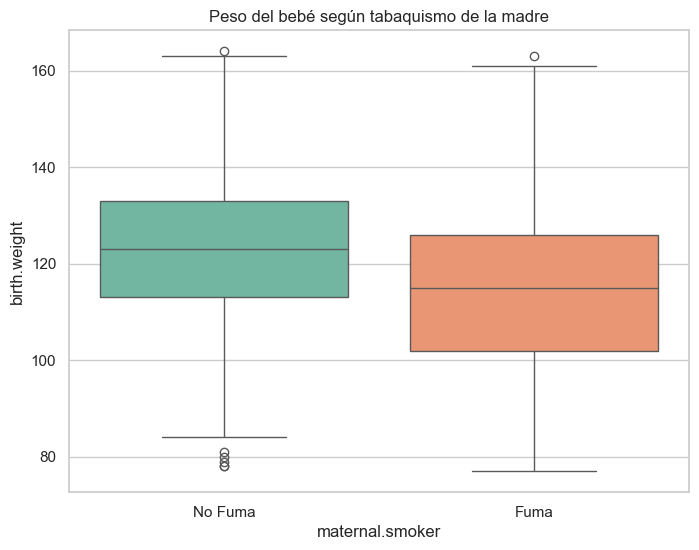

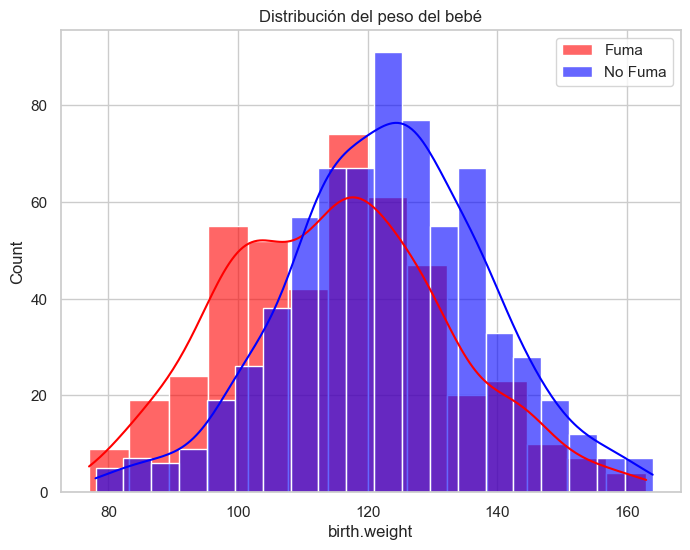

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="maternal.smoker", y="birth.weight", data=df, palette="Set2")
plt.xticks([0,1], ["No Fuma", "Fuma"])
plt.title("Peso del bebé según tabaquismo de la madre")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(fumadoras, kde=True, color="red", label="Fuma", alpha=0.6)
sns.histplot(no_fumadoras, kde=True, color="blue", label="No Fuma", alpha=0.6)
plt.title("Distribución del peso del bebé")
plt.legend()
plt.show()


## 6. Prueba estadística: ¿hay diferencia significativa en el peso?

Aplicamos una prueba t de Student para dos muestras independientes:
- H0: No hay diferencia en el peso del bebé entre madres fumadoras y no fumadoras.
- H1: Sí existe diferencia.


In [15]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(fumadoras, no_fumadoras, equal_var=False)

print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 5))

if p_value < 0.05:
    print("✅ Se rechaza H0: Existe diferencia significativa.")
else:
    print("❌ No se rechaza H0: No hay evidencia de diferencia significativa.")


t-statistic: -8.068
p-value: 0.0
✅ Se rechaza H0: Existe diferencia significativa.


## 7. Análisis adicional

Podemos explorar la relación entre el peso del bebé y otras variables como:
- Edad de la madre (`maternal_age`)
- Altura de la madre (`maternal_height`)
- Peso previo al embarazo (`maternal_pregnancy_weight`)


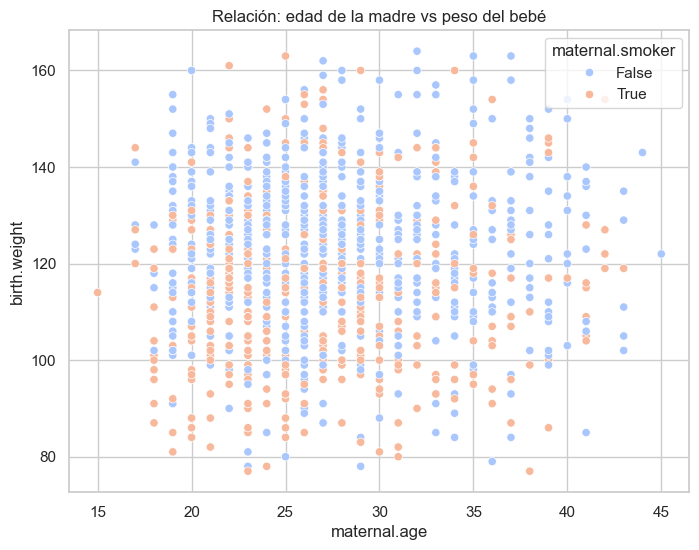

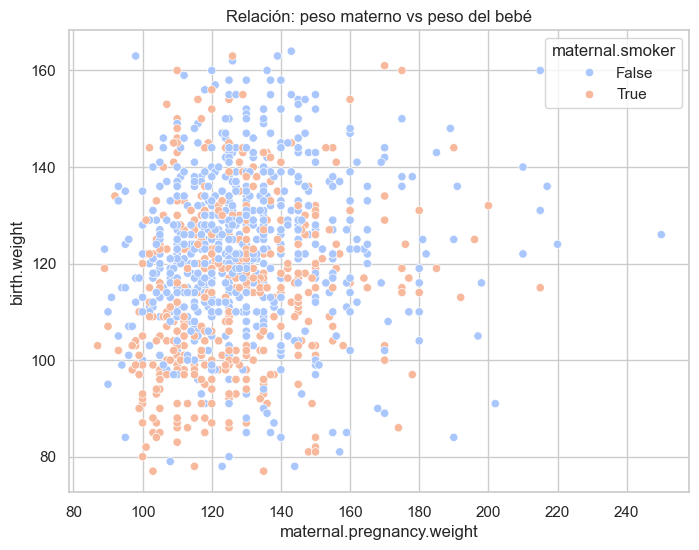

Correlaciones con el peso del bebé:
birth.weight                 1.000000
gestational.days             0.344884
maternal.height              0.203651
maternal.pregnancy.weight    0.148730
maternal.age                 0.054907
unnamed:_0                  -0.051300
maternal.smoker             -0.236676
Name: birth.weight, dtype: float64


In [16]:
# Relación entre peso del bebé y edad de la madre
sns.scatterplot(data=df, x="maternal.age", y="birth.weight", hue="maternal.smoker", palette="coolwarm")
plt.title("Relación: edad de la madre vs peso del bebé")
plt.show()

# Relación entre peso del bebé y peso de la madre antes del embarazo
sns.scatterplot(data=df, x="maternal.pregnancy.weight", y="birth.weight", hue="maternal.smoker", palette="coolwarm")
plt.title("Relación: peso materno vs peso del bebé")
plt.show()

# Correlaciones numéricas
corr = df.corr(numeric_only=True)["birth.weight"].sort_values(ascending=False)
print("Correlaciones con el peso del bebé:")
print(corr)


## 8. Probabilidad de que una madre fume

Calculamos la proporción de madres fumadoras en el dataset. Esta proporción será la probabilidad empírica p_hat.

In [17]:
p_hat = df["maternal.smoker"].mean()
print("Probabilidad estimada de que una madre fume (p̂):", round(p_hat, 3))


Probabilidad estimada de que una madre fume (p̂): 0.391


## 9. Modelo Binomial para 5 madres

Construimos un modelo binomial con parámetros:

n = 5 `madres escogidas al azar`

p = p_hat `probabilidad de fumar`

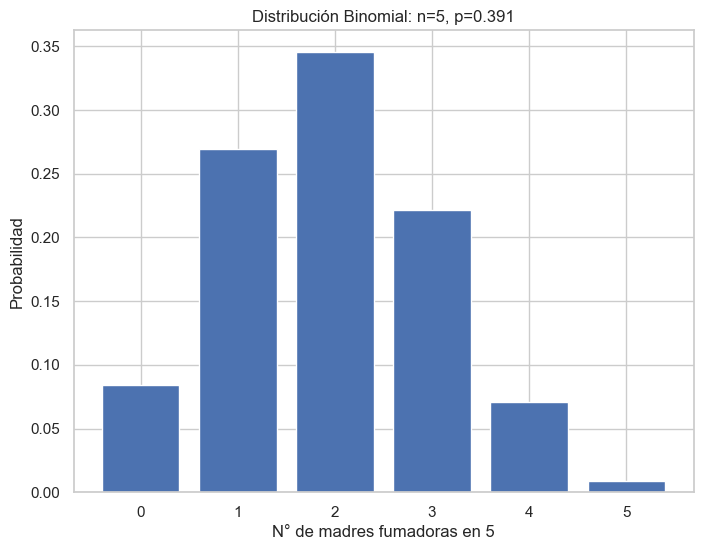

,fumadoras,P(X=x)
0,0,0.084
1,1,0.269
2,2,0.345
3,3,0.221
4,4,0.071
5,5,0.009


In [18]:
from scipy.stats import binom

n = 5
x = np.arange(0, n+1)
binom_probs = binom.pmf(x, n, p_hat)

plt.bar(x, binom_probs)
plt.title(f"Distribución Binomial: n={n}, p={p_hat:.3f}")
plt.xlabel("N° de madres fumadoras de 5")
plt.ylabel("Probabilidad")
plt.show()

pd.DataFrame({"fumadoras": x, "P(X=x)": np.round(binom_probs,3)})


## 10. Simulación binomial (1000 muestras de tamaño 8)

Generamos 1000 muestras simuladas a partir de la distribución binomial para n=8. Calculamos las medias muestrales.

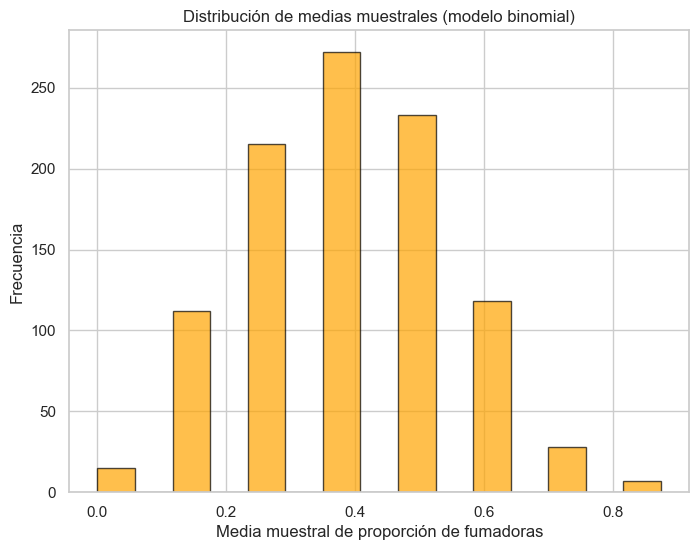

In [19]:
n_samples = 1000
n_mothers = 8

sim_binomial = binom.rvs(n=n_mothers, p=p_hat, size=n_samples)
media_binomial = sim_binomial / n_mothers  # proporción de fumadoras en cada muestra

plt.hist(media_binomial, bins=15, color="orange", alpha=0.7, edgecolor="black")
plt.title("Distribución de medias (modelo binomial)")
plt.xlabel("Media de proporción de fumadoras")
plt.ylabel("Frecuencia")
plt.show()


## 11. Simulación con datos reales (1000 muestras de tamaño 8)

Extraemos 1000 muestras directamente desde el dataset (muestreo con reemplazo) y calculamos las medias de fumadoras.

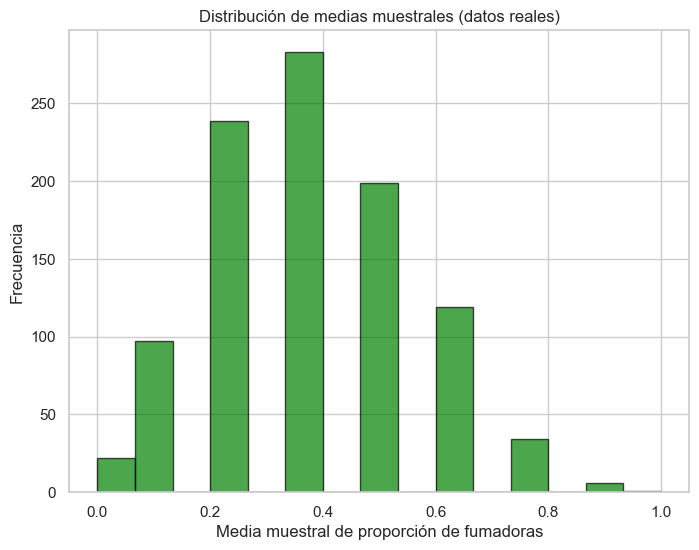

In [21]:
real_means = []

for _ in range(n_samples):
    sample = df["maternal.smoker"].sample(n=n_mothers, replace=True)
    real_means.append(sample.mean())

real_means = np.array(real_means)

plt.hist(real_means, bins=15, color="green", alpha=0.7, edgecolor="black")
plt.title("Distribución de medias muestrales (datos reales)")
plt.xlabel("Media muestral de proporción de fumadoras")
plt.ylabel("Frecuencia")
plt.show()


## 12. Comparación de distribuciones y Teorema del Límite Central

Comparamos las distribuciones de medias muestrales:

- Modelo binomial (simulado)

- Datos reales

- Aproximación normal (según TLC)

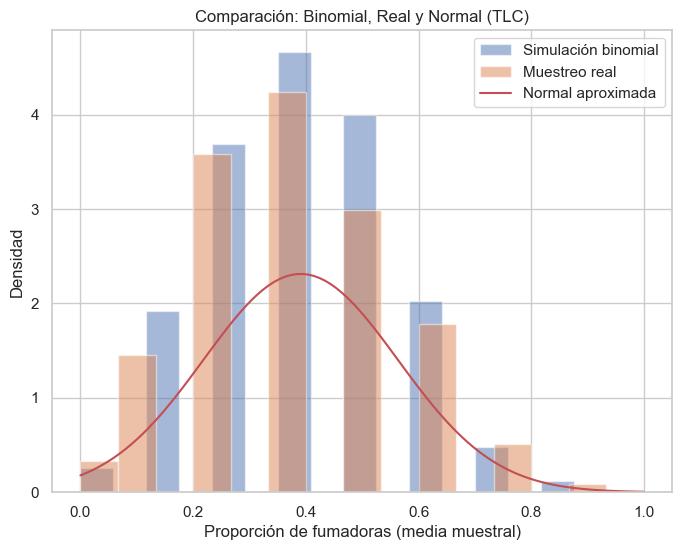

In [22]:
mu = p_hat
sigma = np.sqrt(p_hat*(1-p_hat)/n_mothers)

x_vals = np.linspace(0,1,100)
normal_pdf = stats.norm.pdf(x_vals, mu, sigma)

plt.hist(media_binomial, bins=15, alpha=0.5, label="Simulación binomial", density=True)
plt.hist(real_means, bins=15, alpha=0.5, label="Muestreo real", density=True)
plt.plot(x_vals, normal_pdf, "r-", label="Normal aproximada")
plt.title("Comparación: Binomial, Real y Normal (TLC)")
plt.xlabel("Proporción de fumadoras (media muestral)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


## Conclusiones finales

- La probabilidad estimada de que una madre fume es cercana a p_hat.

- El modelo binomial describe adecuadamente la distribución de madres fumadoras en muestras pequeñas (n=5, n=8).

- Al comparar las simulaciones con el dataset real, observamos que los resultados son consistentes.

- La aproximación normal obtenida a partir del TLC describe de forma adecuada la distribución de las medias muestrales cuando se consideran muchas repeticiones.

✅ Esto confirma en la práctica el Teorema del Límite Central: las medias de las muestras (reales y simuladas) tienden a distribuirse normalmente, incluso si la variable original es binomial.
